# [Data Preprocessing]
# One Hot Encoding & Dummy Variables

## Import Libearies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
dummy_df = pd.get_dummies(df)
dummy_df

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [5]:
pd.get_dummies(df, drop_first=True)

,total_bill,tip,size,sex_Female,smoker_No,day_Fri,day_Sat,day_Sun,time_Dinner
0,16.99,1.01,2,1,1,0,0,1,1
1,10.34,1.66,3,0,1,0,0,1,1
2,21.01,3.50,3,0,1,0,0,1,1
3,23.68,3.31,2,0,1,0,0,1,1
4,24.59,3.61,4,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,1
240,27.18,2.00,2,1,0,0,1,0,1
241,22.67,2.00,2,0,0,0,1,0,1
242,17.82,1.75,2,0,1,0,1,0,1


## One-Hot Encoding with Scikit-Learn

In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
oh_enc = OneHotEncoder(sparse=False)

In [8]:
oh_enc_arr = oh_enc.fit_transform(df[['sex', 'smoker', 'day', 'time']])
oh_enc_arr

array([[1., 0., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 1., 0.]])

In [9]:
dummy_df.keys()

Index(['total_bill', 'tip', 'size', 'sex_Male', 'sex_Female', 'smoker_Yes',
       'smoker_No', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch',
       'time_Dinner'],
      dtype='object')

In [10]:
oh_enc_df = pd.DataFrame(oh_enc_arr, columns=['sex_Male', 'sex_Female', 'smoker_Yes',
       'smoker_No', 'day_Thur', 'day_Fri', 'day_Sat', 'day_Sun', 'time_Lunch',
       'time_Dinner'])
oh_enc_df

,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Label Encoding & Ordinal Encoding

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
pd.set_option('display.max_rows', None)

In [13]:
train_df = pd.read_csv('./DATA INPUT/train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [14]:
df_2 = train_df[['KitchenQual','BldgType']]

In [15]:
le = LabelEncoder()

In [16]:
le.fit_transform(df_2['BldgType'])

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
df_2['BldgType_L_enc'] = le.fit_transform(df_2['BldgType'])
df_2

<ipython-input-17-dae7f745c0f9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['BldgType_L_enc'] = le.fit_transform(df_2['BldgType'])


,KitchenQual,BldgType,BldgType_L_enc
0,Gd,1Fam,0
1,TA,1Fam,0
2,Gd,1Fam,0
3,Gd,1Fam,0
4,Gd,1Fam,0
5,TA,1Fam,0
6,Gd,1Fam,0
7,TA,1Fam,0
8,TA,1Fam,0
9,TA,2fmCon,1


In [18]:
train_df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [19]:
train_df['KitchenQual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

In [20]:
order_label = {'Ex':4, 'Gd':3, 'TA':2, 'Fa':1}

In [21]:
df_2['KitchenQual_df2'] = df_2['KitchenQual'].map(order_label)

<ipython-input-21-473c4317709b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['KitchenQual_df2'] = df_2['KitchenQual'].map(order_label)


In [22]:
df_2

,KitchenQual,BldgType,BldgType_L_enc,KitchenQual_df2
0,Gd,1Fam,0,3
1,TA,1Fam,0,2
2,Gd,1Fam,0,3
3,Gd,1Fam,0,3
4,Gd,1Fam,0,3
5,TA,1Fam,0,2
6,Gd,1Fam,0,3
7,TA,1Fam,0,2
8,TA,1Fam,0,2
9,TA,2fmCon,1,2


# Standardization & Normalization 

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [24]:
ti_df = sns.load_dataset('titanic')
ti_df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [25]:
df_3 = ti_df[['survived', 'pclass', 'age', 'parch']]
df_3.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [26]:
df_3.isnull().sum()

survived      0
pclass        0
age         177
parch         0
dtype: int64

In [27]:
df_mean = df_3.fillna(df_3.mean())

In [28]:
x = df_mean.drop('survived', axis=1)
y = df_mean['survived']
x.shape, y.shape

((891, 3), (891,))

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=51)
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [30]:
# StandardScaler
sc = StandardScaler()
sc.fit(x_train)

StandardScaler()

In [31]:
sc.mean_

array([ 2.30617978, 29.55409121,  0.39185393])

In [32]:
sc.scale_

array([ 0.84405789, 12.99162985,  0.79647463])

In [33]:
x_train.describe()

,pclass,age,parch
count,712.000000,712.000000,712.000000
mean,2.306180,29.554091,0.391854
std,0.844651,13.000763,0.797035
min,1.000000,0.420000,0.000000
25%,1.750000,22.000000,0.000000
50%,3.000000,29.699118,0.000000
75%,3.000000,35.000000,0.000000
max,3.000000,71.000000,5.000000


In [34]:
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [35]:
x_train_sc

array([[ 0.8220055 , -0.42751304, -0.49198545],
       [ 0.8220055 ,  1.997125  , -0.49198545],
       [ 0.8220055 , -1.42815732, -0.49198545],
       ...,
       [ 0.8220055 ,  1.41983023,  3.27461284],
       [ 0.8220055 ,  0.01116307,  0.76354731],
       [ 0.8220055 , -0.08113618, -0.49198545]])

In [36]:
x_train_sc = pd.DataFrame(x_train_sc, columns=['pclass', 'age', 'parch'])
x_test_sc = pd.DataFrame(x_test_sc, columns=['pclass', 'age', 'parch'])

In [37]:
x_train_sc.head()

,pclass,age,parch
0,0.822005,-0.427513,-0.491985
1,0.822005,1.997125,-0.491985
2,0.822005,-1.428157,-0.491985
3,0.822005,-0.889349,-0.491985
4,0.822005,0.011163,2.019080


In [38]:
x_test_sc.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,0.01,0.06,-0.06
std,0.95,1.00,1.06
min,-1.55,-2.21,-0.49
25%,-0.36,-0.47,-0.49
50%,0.82,0.01,-0.49
75%,0.82,0.42,-0.49
max,0.82,3.88,7.04


In [39]:
# MinMaxScaler
mmc = MinMaxScaler()
mmc.fit(x_train)

MinMaxScaler()

In [40]:
x_train_mmc = mmc.transform(x_train)
x_test_mmc = mmc.transform(x_test)

In [41]:
x_train_mmc

array([[1.        , 0.33408898, 0.        ],
       [1.        , 0.78039105, 0.        ],
       [1.        , 0.14990082, 0.        ],
       ...,
       [1.        , 0.67412865, 0.6       ],
       [1.        , 0.4148359 , 0.2       ],
       [1.        , 0.39784642, 0.        ]])

In [42]:
x_train_mmc = pd.DataFrame(x_train_mmc, columns=['pclass', 'age', 'parch'])
x_test_mmc = pd.DataFrame(x_test_mmc, columns=['pclass', 'age', 'parch'])

In [43]:
x_test_mmc.describe().round(2)

,pclass,age,parch
count,179.00,179.00,179.00
mean,0.66,0.42,0.07
std,0.40,0.18,0.17
min,0.00,0.01,0.00
25%,0.50,0.33,0.00
50%,1.00,0.41,0.00
75%,1.00,0.49,0.00
max,1.00,1.13,1.20


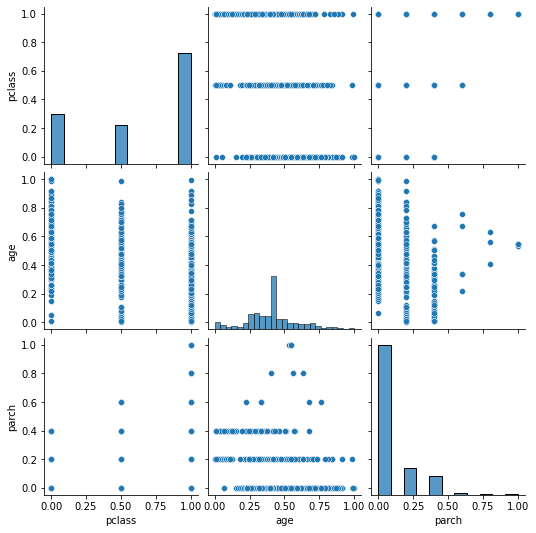

In [44]:
sns.pairplot(x_train_mmc);

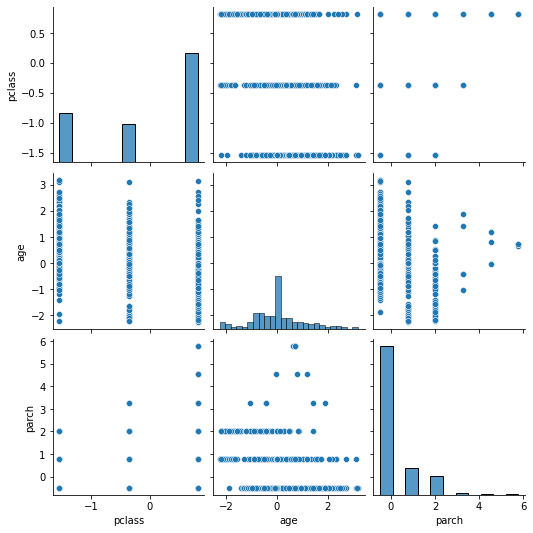

In [45]:
sns.pairplot(x_train_sc);